In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
analysis_gene_names = ['SLC1A2']
genes = dict()
for gene_name in analysis_gene_names:
    genes['AD-'+gene_name] = pd.read_csv('tmp/related_genes_{}_AD.csv'.format(gene_name))
    genes['AD-'+gene_name]['value'] /= genes['AD-'+gene_name]['value'].max()
    genes['AD-'+gene_name]['category'] = 'AD-' + gene_name

for gene_name in analysis_gene_names:
    genes['control-'+gene_name] = pd.read_csv('tmp/related_genes_{}_Control.csv'.format(gene_name))
    genes['control-'+gene_name]['value'] /= genes['control-'+gene_name]['value'].max()
    genes['control-'+gene_name]['category'] = 'control-' + gene_name

for gene_name in analysis_gene_names:
    genes[gene_name] = pd.read_csv('../related-genes/tmp/related_genes_{}.csv'.format(gene_name))
    genes[gene_name]['value'] /= genes[gene_name]['value'].max()
    genes[gene_name]['category'] = gene_name

genes = pd.concat(list(genes.values()))
genes

,index,value,name,category
0,5785,1.000000,LSAMP,AD-SLC1A2
1,8039,0.366011,LRP1B,AD-SLC1A2
2,12806,0.253334,DST,AD-SLC1A2
3,5361,0.229359,DTNA,AD-SLC1A2
4,3367,0.212515,PITPNC1,AD-SLC1A2
...,...,...,...,...
29115,8227,-0.048751,PPP2R2B,SLC1A2
29116,18171,-0.050097,LHFP,SLC1A2
29117,23665,-0.059146,DTNA,SLC1A2
29118,13736,-0.060009,CACNB2,SLC1A2


In [3]:
TF = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_TF', sep='\t', index_col=0)
TF_cofactors = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_TF_cofactors', sep='\t', index_col=0)
RBP = pd.read_csv('/lmh_data/data/sclab/source/Homo_sapiens_RBP', sep='\t', index_col=0, header=None)

In [4]:
TF, TF_cofactors, RBP = TF['Symbol'].unique(), TF_cofactors['Symbol'].unique(), RBP[1].unique()
gene_names = set(TF) | set(TF_cofactors) | set(RBP)

/tmp/ipykernel_39896/2793610716.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  _genes = _genes.loc[_gene_names]
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/seaborn/matrix.py:1221: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


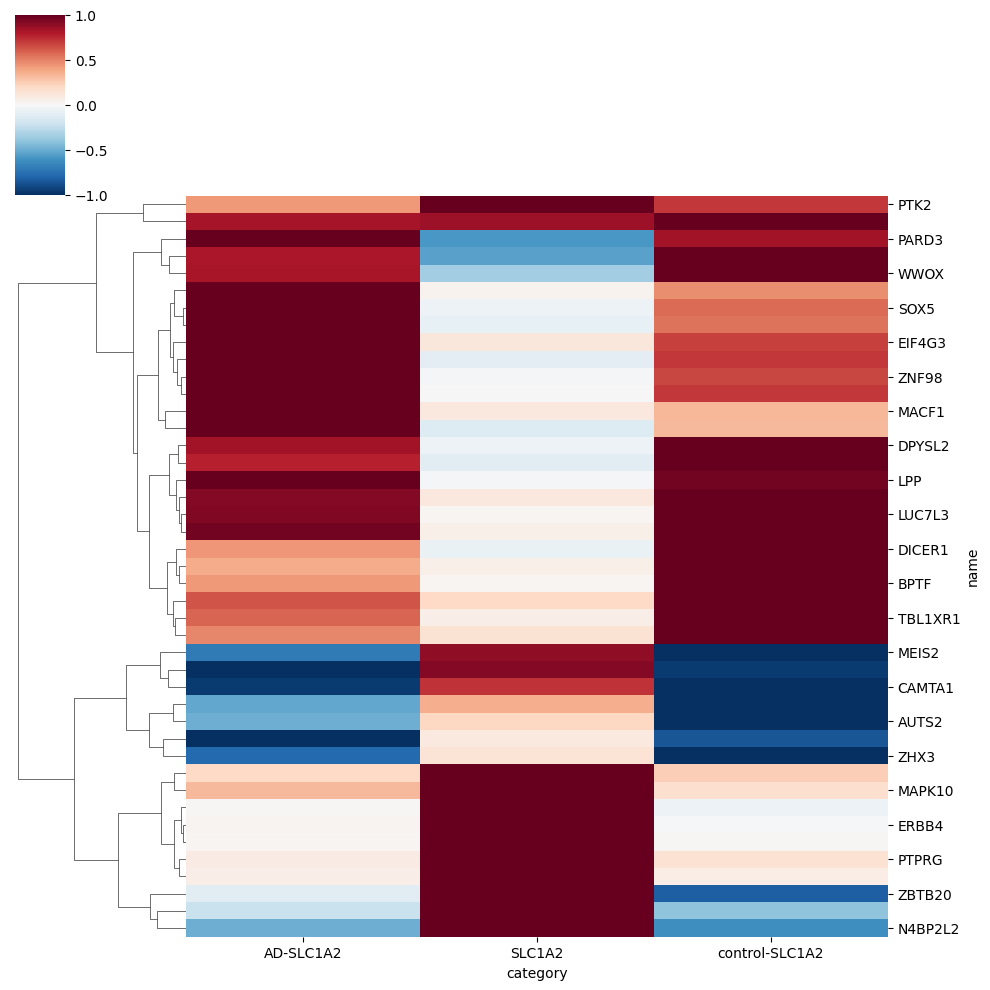

In [5]:
_genes = pd.pivot(genes[genes['name'].isin(gene_names)], index='name', columns='category', values='value')
_gene_names = set()
_columns = _genes.columns
for gene_name in _columns:
    _gene_names = _gene_names | set(_genes.nlargest(20, gene_name).index)
_genes = _genes.loc[_gene_names]
_genes = _genes.div(_genes.abs().max(axis=1), axis=0)

_genes = _genes[_columns]
sns.clustermap(data=_genes, square=True, cmap='RdBu_r', center=0, col_cluster=False)
plt.show()

In [6]:
_genes = pd.pivot(genes[genes['name'].isin(gene_names)], index='name', columns='category', values='value')
for gene_name in _columns:
    print('{}: {}'.format(gene_name, set(_genes.nlargest(20, gene_name).index)))

AD-SLC1A2: {'MACF1', 'DPYSL2', 'SOX5', 'ATRX', 'CELF2', 'NPAS3', 'ZNF98', 'PARD3', 'SH3PXD2B', 'NPAS2', 'DST', 'WWOX', 'RERE', 'LPP', 'BPTF', 'EIF4G3', 'ARNT2', 'PBX1', 'PALLD', 'SYNE1'}
SLC1A2: {'RORA', 'ZBTB20', 'ERBB4', 'ZFHX4', 'TCF4', 'NFIB', 'CTNND2', 'CAMTA1', 'PTK2', 'AUTS2', 'NPAS3', 'MAPK10', 'ZHX3', 'DST', 'FTH1', 'QKI', 'N4BP2L2', 'PTPRG', 'HSPA1A', 'MEIS2'}
control-SLC1A2: {'KLF12', 'LUC7L3', 'DPYSL2', 'SOX5', 'ATRX', 'CELF2', 'NPAS3', 'TBL1XR1', 'PARD3', 'SH3PXD2B', 'DST', 'WWOX', 'RERE', 'LPP', 'BPTF', 'UTRN', 'PBX1', 'ARNT2', 'DICER1', 'SYNE1'}
